In [1]:
from torcheeg.datasets import SEEDDataset
from torcheeg import transforms
from torcheeg.datasets.constants import SEED_CHANNEL_LOCATION_DICT

dataset1 = SEEDDataset(root_path='./SEED/SEED_EEG/Preprocessed_EEG',
                      io_path='./.torcheeg/datasets_1732642665062_seDY1',
                      offline_transform=transforms.Compose([
                          transforms.BandDifferentialEntropy(),
                          transforms.ToGrid(SEED_CHANNEL_LOCATION_DICT)
                      ]),
                      online_transform=transforms.ToTensor(),
                      label_transform=transforms.Compose([
                          transforms.Select('emotion'),
                          transforms.Lambda(lambda x: x + 1)
                      ]),
                      num_worker=4)
print(dataset1[0])

[2024-12-03 00:29:10] INFO (torcheeg/MainThread) 🔍 | Detected cached processing results, reading cache from ./.torcheeg/datasets_1732642665062_seDY1.


(tensor([[[ 0.0000,  0.0000,  0.0000,  5.1832,  5.0887,  4.9807,  0.0000,
           0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  4.5553,  0.0000,  4.2643,  0.0000,
           0.0000,  0.0000],
         [ 4.2014,  4.0099,  3.8065,  3.8590,  3.7828,  3.7195,  3.3290,
           3.8660,  3.5138],
         [ 3.5574,  3.8370,  3.1473,  3.1314,  3.4455,  2.8615,  2.8605,
           3.1997,  4.4979],
         [ 3.8301,  3.7472,  3.4873,  2.9300, -0.5460,  2.4503,  3.2057,
           3.7392,  4.5785],
         [ 3.8620,  3.5352,  3.4424,  3.1226, -0.6533,  2.3607,  3.8760,
           4.0473,  4.4404],
         [ 3.9283,  3.7993,  3.6490,  4.5985,  3.1423,  3.5070,  3.8388,
           4.3632,  4.5748],
         [ 0.0000,  4.0628,  4.0962,  3.8834,  3.8629,  4.1004,  4.5013,
           4.5144,  0.0000],
         [ 0.0000,  0.0000,  4.2134,  4.0241,  4.0828,  4.3369,  4.3554,
           0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  4.1442,  3.9311,  3.9702,  0.0000,
      

In [27]:
sample = dataset1[0]
eeg_data, label = sample[0], sample[1]

print(f"EEG data shape: {eeg_data.shape}")  # Example: [Channels, Height, Width]
print(f"Label: {label}")


EEG data shape: torch.Size([4, 9, 9])
Label: 2


In [29]:
raw_dataset = SEEDDataset(
    root_path='./SEED/SEED_EEG/Preprocessed_EEG',
    online_transform=None,  # Disable transforms
    label_transform=None,
    num_worker=4
)

raw_sample = raw_dataset[0]
print(f"Raw EEG data shape: {raw_sample[0].shape}")  # Should be [62, ...] for SEED


[2024-12-03 02:23:30] INFO (torcheeg/MainThread) 🔍 | Processing EEG data. Processed EEG data has been cached to .torcheeg\datasets_1733174610032_5iJyS.
[2024-12-03 02:23:30] INFO (torcheeg/MainThread) ⏳ | Monitoring the detailed processing of a record for debugging. The processing of other records will only be reported in percentage to keep it clean.
[PROCESS]: 100%|██████████| 45/45 [2:45:48<00:00, 221.07s/it]  
[2024-12-03 05:32:26] INFO (torcheeg/MainThread) ✅ | All processed EEG data has been cached to .torcheeg\datasets_1733174610032_5iJyS.
[2024-12-03 05:32:26] INFO (torcheeg/MainThread) 😊 | Please set io_path to .torcheeg\datasets_1733174610032_5iJyS for the next run, to directly read from the cache if you wish to skip the data processing step.


Raw EEG data shape: (62, 200)


C:\Users\hamza\AppData\Local\Temp\ipykernel_22788\127315235.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = plot_3d_tensor(torch.tensor(dataset1[0][0]))


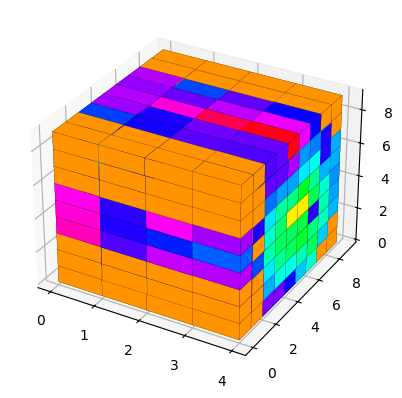

In [9]:
import torch
from torcheeg.utils import plot_3d_tensor

img = plot_3d_tensor(torch.tensor(dataset1[0][0]))

In [ ]:
from torcheeg.model_selection import LeaveOneSubjectOut
from torch.utils.data import DataLoader


print(f"Dataset size: {len(dataset1)}")
print(f"Sample format: {dataset1[0]}")  # Check a single sample

ImportError: cannot import name 'DataLoader' from 'torcheeg.utils' (e:\FYP\Egg-Based Emotion Recognition\EEg-based-Emotion-Recognition\.venv\Lib\site-packages\torcheeg\utils\__init__.py)

In [16]:
cv = LeaveOneSubjectOut(split_path="./.torcheeg/model_selection_1733170381284_4iFXA")
for train_dataset, test_dataset in cv.split(dataset1):
    print(f"Train size: {len(train_dataset)}, Test size: {len(test_dataset)}")
    train_loader = DataLoader(train_dataset)
    test_loader = DataLoader(test_dataset)

[2024-12-03 01:15:47] INFO (torcheeg/MainThread) 📊 | Detected existing split of train and test set, use existing split from ./.torcheeg/model_selection_1733170381284_4iFXA.
[2024-12-03 01:15:47] INFO (torcheeg/MainThread) 💡 | If the dataset is re-generated, you need to re-generate the split of the dataset instead of using the previous split.


Train size: 142548, Test size: 10182
Train size: 142548, Test size: 10182
Train size: 142548, Test size: 10182
Train size: 142548, Test size: 10182
Train size: 142548, Test size: 10182
Train size: 142548, Test size: 10182
Train size: 142548, Test size: 10182
Train size: 142548, Test size: 10182
Train size: 142548, Test size: 10182
Train size: 142548, Test size: 10182
Train size: 142548, Test size: 10182
Train size: 142548, Test size: 10182
Train size: 142548, Test size: 10182
Train size: 142548, Test size: 10182
Train size: 142548, Test size: 10182


In [17]:
# Debug a single batch
eeg_batch, label_batch = next(iter(train_loader))
print(f"EEG batch shape: {eeg_batch.shape}")  # Example: [Batch, Channels, Height, Width]
print(f"Label batch shape: {label_batch.shape}")  # Example: [Batch]


EEG batch shape: torch.Size([1, 4, 9, 9])
Label batch shape: torch.Size([1])


In [19]:
# Initialize LOSO cross-validation
cv = LeaveOneSubjectOut()

# Iterate through splits
for fold_idx, (train_dataset, test_dataset) in enumerate(cv.split(dataset1)):
    print(f"Fold {fold_idx + 1}")
    
    # Get subject IDs in training and test sets
    train_subjects = set(train_dataset.info['subject_id'])
    test_subjects = set(test_dataset.info['subject_id'])
    
    # Validate that test subjects are not in train subjects
    assert train_subjects.isdisjoint(test_subjects), "Overlap detected between train and test subjects!"

    print(f"Train subjects: {train_subjects}")
    print(f"Test subject: {test_subjects}")
    print(f"Train dataset size: {len(train_dataset)}, Test dataset size: {len(test_dataset)}")
    

[2024-12-03 01:35:17] INFO (torcheeg/MainThread) 📊 | Create the split of train and test set.
[2024-12-03 01:35:17] INFO (torcheeg/MainThread) 😊 | Please set split_path to .torcheeg\model_selection_1733171717133_vUHzc for the next run, if you want to use the same setting for the experiment.


Fold 1
Train subjects: {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Test subject: {1}
Train dataset size: 142548, Test dataset size: 10182
Fold 2
Train subjects: {1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15}
Test subject: {10}
Train dataset size: 142548, Test dataset size: 10182
Fold 3
Train subjects: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15}
Test subject: {11}
Train dataset size: 142548, Test dataset size: 10182
Fold 4
Train subjects: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15}
Test subject: {12}
Train dataset size: 142548, Test dataset size: 10182
Fold 5
Train subjects: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15}
Test subject: {13}
Train dataset size: 142548, Test dataset size: 10182
Fold 6
Train subjects: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15}
Test subject: {14}
Train dataset size: 142548, Test dataset size: 10182
Fold 7
Train subjects: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
Test subject: {15}
Train dataset size: 142548, Test dataset size: 10182

In [22]:
cv = LeaveOneSubjectOut()

for train_dataset, test_dataset in cv.split(dataset1):
    train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)
    


[2024-12-03 01:40:53] INFO (torcheeg/MainThread) 📊 | Create the split of train and test set.
[2024-12-03 01:40:53] INFO (torcheeg/MainThread) 😊 | Please set split_path to .torcheeg\model_selection_1733172053368_p0ahT for the next run, if you want to use the same setting for the experiment.


In [23]:
import torch.nn as nn
import torch.nn.functional as F

class BaseEncoder(nn.Module):
    def __init__(self):
        super(BaseEncoder, self).__init__()
        self.spatial_conv = nn.Conv2d(62,16,kernel_size=(1,1))
        self.temporal_conv = nn.Conv2d(16,16,kernel_size=(1,48))
        self.pool = nn.MaxPool2d(kernel_size=(1,24))
        self.flattern = nn.Flatten()
        self.fc = nn.Linear(16*1*1, 128)
        
    def forward(self, x):
        x = F.relu(self.spatial_conv(x))
        x = F.relu(self.temporal_conv(x))
        x = self.pool(x)
        x = self.flattern(x)
        return F.relu(self.fc(x))

In [24]:
class Projector(nn.Module):
    def __init__(self):
        super(Projector, self).__init__()
        self.avg_pool = nn.AvgPool2d(kernel_size=(1, 24))  # Pooling kernel length S=24
        self.spatial_filter = nn.Conv2d(16, 32, kernel_size=(1, 1))  # Spatial filter CK2=32
        self.temporal_filter = nn.Conv2d(32, 64, kernel_size=(1, 4))  # Temporal filter P2=4, C2K2=64
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(64, 64)

    def forward(self, x):
        x = self.avg_pool(x)
        x = F.relu(self.spatial_filter(x))
        x = F.relu(self.temporal_filter(x))
        x = self.flatten(x)
        return self.fc(x)


In [25]:
class ContrastiveLoss(nn.Module):
    def __init__(self, temperature=0.1):
        super(ContrastiveLoss, self).__init__()
        self.temperature = temperature

    def forward(self, z_i, z_j):
        z_i = F.normalize(z_i, dim=1)
        z_j = F.normalize(z_j, dim=1)
        similarity_matrix = torch.mm(z_i, z_j.T) / self.temperature
        labels = torch.arange(z_i.size(0)).to(z_i.device)
        return F.cross_entropy(similarity_matrix, labels)


In [ ]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter(log_dir="./runs/contrastive_learning_newapproach")

encoder = BaseEncoder().cuda()
projector = Projector().cuda()
contrastive_loss = ContrastiveLoss().cuda()

optimizer = torch.optim.Adam(list(encoder.parameters()) + list(projector.parameters()), lr=0.0007, weight_decay=0.015)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100, eta_min=1e-6)

for epoch in range(100):
    encoder.train()
    projector.train()
    total_loss = 0

    for eeg, _ in train_loader:  # Ignore labels during contrastive learning
        eeg = eeg.cuda()

        z_i = projector(encoder(eeg))
        z_j = projector(encoder(eeg))  # Positive pair

        loss = contrastive_loss(z_i, z_j)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        
        # Log loss to TensorBoard
        writer.add_scalar("Loss", loss.item(), epoch * len(train_loader))

    scheduler.step()
    writer.add_scalar("Training Loss/Average Per Epoch", total_loss / len(train_loader), epoch)
    writer.add_scalar("Learning Rate", optimizer.param_groups[0]['lr'], epoch)

    # Log weights (every 5 epochs to save memory)
    if epoch % 5 == 0:
        writer.add_histogram("Encoder/Conv1 Weights", encoder.spatial_conv.weight, epoch)
        writer.add_histogram("Projector/Conv1 Weights", projector.spatial_filter.weight, epoch)
        writer.add_histogram("Projector/Conv2 Weights", projector.temporal_filter.weight, epoch)
        writer.add_histogram("Encoder/FC Weights", encoder.fc.weight, epoch)
        writer.add_histogram("Projector/FC Weights", projector.fc.weight, epoch)

    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader):.4f}")

    
# Save model
torch.save(encoder.state_dict(), "./Models/Encoder/encoder.pth")
torch.save(projector.state_dict(), "./Models/Projector/projector.pth")
torch.save(optimizer.state_dict(), "./Models/Optimizer/optimizer.pth")
torch.save(scheduler.state_dict(), "./Models/Scheduler/scheduler.pth")
torch.save(contrastive_loss.state_dict(), "./Models/ContrastiveLoss/contrastive_loss.pth")

    
    

RuntimeError: Given groups=1, weight of size [16, 62, 1, 1], expected input[256, 4, 9, 9] to have 62 channels, but got 4 channels instead